## week_06

## nltk lnaugural

In [1]:
import nltk

nltk.download(['brown', 'inaugural'])

[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\Ativ\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\Ativ\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


True

In [2]:
brown = nltk.corpus.brown

In [3]:
nltk.download(['brown', 'gutenberg', 'inaugural'])

[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\Ativ\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\Ativ\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\Ativ\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


True

In [3]:
# cfd 어떤 컨디션을 정해 그 컨디션에 맞는 빈도수를 설정
cfd = nltk.ConditionalFreqDist(
    (genre, word)
    for genre in brown.categories()
    for word in brown.words(categories=genre) # fileids
)

modals = ['can', 'could', 'would', 'will', 'might', 'may']
cfd.tabulate(conditions=brown.categories(), samples=modals)

                  can could would  will might   may 
      adventure    46   151   191    50    58     5 
 belles_lettres   246   213   392   236   113   207 
      editorial   121    56   180   233    39    74 
        fiction    37   166   287    52    44     8 
     government   117    38   120   244    13   153 
        hobbies   268    58    78   264    22   131 
          humor    16    30    56    13     8     8 
        learned   365   159   319   340   128   324 
           lore   170   141   186   175    49   165 
        mystery    42   141   186    20    57    13 
           news    93    86   244   389    38    66 
       religion    82    59    68    71    12    78 
        reviews    45    40    47    58    26    45 
        romance    74   193   244    43    51    11 
science_fiction    16    49    79    16    12     4 


In [12]:
# modals의 빈도수가 포함된 cfd ( word -> modal_verb)
cfd1 = nltk.ConditionalFreqDist(
    (genre, modal)
    for genre in brown.categories()
    for modal in ['can', 'could', 'would', 'will', 'might', 'may'] # 컨디션 한정
    
    for word in brown.words(categories=genre)
        if word.lower() == modal
)
cfd1.tabulate()

                  can could   may might  will would 
      adventure    48   154     7    59    51   194 
 belles_lettres   249   216   221   113   246   397 
      editorial   124    57    79    39   235   185 
        fiction    39   168    10    44    56   291 
     government   119    38   179    13   244   120 
        hobbies   276    59   143    22   269    83 
          humor    17    33     8     8    13    56 
        learned   367   159   336   128   340   321 
           lore   170   142   170    50   178   188 
        mystery    45   145    15    57    25   189 
           news    94    87    93    38   389   246 
       religion    84    59    79    12    72    69 
        reviews    45    40    47    26    61    48 
        romance    79   195    11    51    49   247 
science_fiction    16    49     4    12    17    80 


In [4]:
!pip install matplotlib
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
cfd1.plot()

NameError: name 'cfd1' is not defined

<Figure size 864x360 with 0 Axes>

### inaugural 
- 연설문 코퍼스

In [48]:
inaugural = nltk.corpus.inaugural

In [49]:
inaugural.fileids() # 연도-이름.txt | 2021-Biden.txt

['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

In [21]:
# ['america', 'citizen'] 빈도수를 cfd로 만드시오.

cfd = nltk.ConditionalFreqDist(
    (target, fileid[:-4]) #(x, y)
    for fileid in inaugural.fileids()
    for target in ['america', 'citizen']
    
    for word in inaugural.words(fileids=fileid)
        if word.lower() == target # citizen in citizen's
        # if target in word.lower()
        # if word.lower().startswith(target)
)

cfd.tabulate()

        1793-Washington      1797-Adams     1817-Monroe     1821-Monroe      1825-Adams   1837-VanBuren   1841-Harrison     1853-Pierce   1857-Buchanan    1861-Lincoln      1869-Grant      1873-Grant      1877-Hayes   1881-Garfield  1885-Cleveland   1889-Harrison  1893-Cleveland       1909-Taft     1917-Wilson    1921-Harding   1925-Coolidge     1929-Hoover  1937-Roosevelt  1941-Roosevelt  1945-Roosevelt 1953-Eisenhower 1957-Eisenhower    1961-Kennedy    1965-Johnson      1969-Nixon      1973-Nixon     1977-Carter     1981-Reagan     1985-Reagan       1989-Bush    1993-Clinton    1997-Clinton       2001-Bush       2005-Bush      2009-Obama      2013-Obama      2017-Trump      2021-Biden 
america               1               5               0               2               0               1               0               0               1               0               0               0               0               1               0               0               0               4        

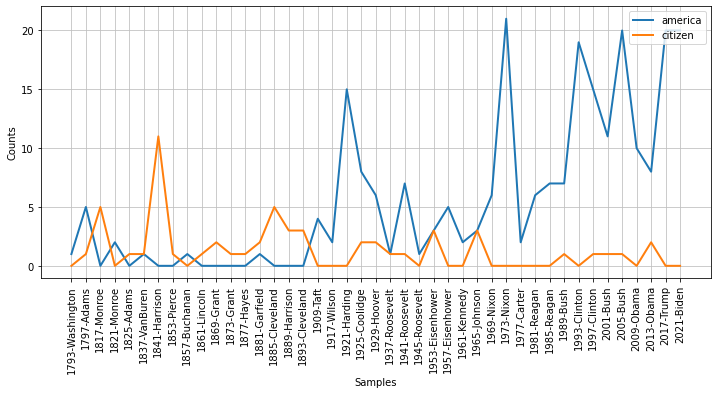

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [29]:
plt.figure(figsize=(12, 5))
cfd.plot()

### Tuple & List
- 불변 객체 vs. 가변객체

In [5]:
# 1. 생성
Tuple = ()
Tuple = tuple()

List = []
List = list()

Tuple, List

((), [])

In [37]:
#1.1 요소 여러 개일 때
alphabetT = ('a', 'b')
alphabetT = 'a', 'b' # 괄호 없이도 가능
alphabetT

alphabetL = ['a', 'b']

('a', 'b')

In [8]:
alpstr = ('T') # 하나일 때는 자료형이 변하지 않음 > str

alp = ('T',)

type(alpstr), type(alp)

(str, tuple)

- packing: 한 변수에 여러 데이터를 할당하는 것.
    - list, tuple 자체. a = [1, 2, 3, 4]
- unpacking: 한 변수에 여러 데이터가 들어 있을 때 여러 변수에 나누는 것
    - n1 = '1', n2 = '2', n3 = '3'

In [9]:
n1, n2, n3 = '123'
n1, n2, n3

('1', '2', '3')

In [11]:
# 값 교환하기 유용 > tuple
pwd = '1234'
userId = 'abc'

"""
temp1 = userId
temp2 = pwd
pwd = temp1
userId = temp2
"""

#튜플의 경우
pwd, userId = userId, pwd
pwd, userId

('abc', '1234')

In [16]:
# 연산
#('ㅅ',) * (1, 2)
(1, 2) * 5

(1, 2, 1, 2, 1, 2, 1, 2, 1, 2)

In [21]:
a = (3)
b = (2, 3)

id(a), id(a * b) # id 값이 다름 > 새로운 변수에 할당이 됨

(1400269203824, 1400443749664)

In [27]:
# 비교
a = 1, 2
y = 4, 5

a < b # 첫 인자부터 비교

True

In [24]:
# 순회
for i in a:
    print(a)

(1, 2)
(1, 2)


In [28]:
[i for i in a] #1 |리스트로 변환

[1, 2]

In [33]:
# tuple comprehension??? > 없음
tuple([i for i in a]) #2 | list comprehension을 튜플로 변경
*[i for i in a], #3| 느림, 튜플로 변경

(1, 2)

In [37]:
# 형변환
cat = 'cat'
catT = tuple(cat)
catT, (cat)

(('c', 'a', 't'), 'cat')

In [34]:
(cat,), ('cat',)

(('cat',), ('cat',))

In [36]:
list(cat), [cat]

(['c', 'a', 't'], ['cat'])

In [38]:
# slicing도 동일하게 가능하다
catT[2]

't'

[정리]
- tuple 장점
    - 변하지 않는 데이터 시퀀스를 만들 수 있다. 타인의 접근을 막는다
        - blue=1, white=2, ...
    - 메모리 사용이 적다
    
- list 장점
    - 튜플 장점 필요없을 때 전부 리스트 사용
    - 데이터를 순차적으로 파악할 때
    - 중복 데이터를 쓸 수 있다는 점vs.set

### 리스트의 유용한 함수들
- 변경, 삭제, 추가
- 리스트컴프리헨션 업그레이드

In [1]:
numL = list(range(5))
numL

[0, 1, 2, 3, 4]

In [2]:
# 추가 
numL.append(7)

In [3]:
# insert(index, item)
num = list(range(6))
num.insert(0, 8)
num

[8, 0, 1, 2, 3, 4, 5]

In [6]:
# 여러 개 추가
x = [2, 3, 4]
num.extend(x)
numL.append(x)
num, numL

([8, 0, 1, 2, 3, 4, 5, 2, 3, 4, 2, 3, 4], [0, 1, 2, 3, 4, 7, [2, 3, 4]])

In [8]:
num += x # extend()와 동일한 방법
num

[8, 0, 1, 2, 3, 4, 5, 2, 3, 4, 2, 3, 4, 2, 3, 4, 2, 3, 4]

In [9]:
# slicing
num[:3] = 2, 2, 2
num

[2, 2, 2, 2, 3, 4, 5, 2, 3, 4, 2, 3, 4, 2, 3, 4, 2, 3, 4]

In [10]:
num[:3] = 'abc'
num

['a', 'b', 'c', 2, 3, 4, 5, 2, 3, 4, 2, 3, 4, 2, 3, 4, 2, 3, 4]

In [12]:
# 삭제 
del num[:3]
num

[5, 2, 3, 4, 2, 3, 4, 2, 3, 4, 2, 3, 4]

In [14]:
# remove(value)
num.remove(4)
num

[5, 2, 3, 2, 3, 2, 3, 4, 2, 3, 4]

In [15]:
# pop(index) | 기본값: -1
num.pop()
num

[5, 2, 3, 2, 3, 2, 3, 4, 2, 3]

In [17]:
num.pop(0)
num

[3, 2, 3, 2, 3, 4, 2, 3]

In [18]:
# clear 
num.clear()
num

[]

In [19]:
# 인덱스
num = list(range(7))
num.index(4)

4

In [21]:
7 in num

False

In [22]:
# 정렬: sort(), sorted()
sorted(num, reverse=True) # 변한 값만 복사해서 출력

[6, 5, 4, 3, 2, 1, 0]

In [24]:
num.sort(reverse=True) # 리스트.sort(), 값을 할당하지 않아도 된다.
num

[6, 5, 4, 3, 2, 1, 0]

In [32]:
# reverse(), reversed()
num.reverse()
num

[0, 1, 2, 3, 4, 5, 6]

In [30]:
reversed(num)

In [7]:
# 할당
a = list(range(1, 7))
a

[1, 2, 3, 4, 5, 6]

In [8]:
b = a # 메모리주소를 참조하는 것
b[0] = 3
a, b

([3, 2, 3, 4, 5, 6], [3, 2, 3, 4, 5, 6])

In [9]:
id(a), id(b)

(2879801979584, 2879801979584)

In [10]:
# shallow copy: 참조하지 않고 새로운 객체에 할당하는 방법. 앞은 복사
c = a.copy()
d = list(a)
e = a[:]

id(a), id(d), id(c), id(e)

(2879801979584, 2879887551488, 2879886936384, 2879887201472)

In [11]:
# deepcopy: 깊은 복사, 하위에 줌첩된 리스트 요소가 안 바뀌도록
a.append([1,2,3])
a

[3, 2, 3, 4, 5, 6, [1, 2, 3]]

In [12]:
f = a.copy()
id(a), id(f)

(2879801979584, 2879857624256)

In [13]:
f[-1][0] = 9
a, f

([3, 2, 3, 4, 5, 6, [9, 2, 3]], [3, 2, 3, 4, 5, 6, [9, 2, 3]])

In [14]:
f[-1][0] 

9

In [15]:
import copy
g = copy.deepcopy(a)
g

[3, 2, 3, 4, 5, 6, [9, 2, 3]]

In [16]:
g[-1][0] = 10
a, g

([3, 2, 3, 4, 5, 6, [9, 2, 3]], [3, 2, 3, 4, 5, 6, [10, 2, 3]])

In [128]:
# 순회: zip =, enumerate
animal = ['dog', 'cat', 'caw']
num = ['7마리', '4마리', '12마리']

#(animal, num)
for item1, item2 in zip(animal, num): # 여러 리스트를 동시에 순환, 하나가 더 많으면 짧은 것 기준으로 순환
    print((item1, item2))

('dog', '7마리')
('cat', '4마리')
('caw', '12마리')


In [19]:
for item1 in animal:
    for item2 in num:
        print(item1, item2)

dog 7마리
dog 4마리
dog 12마리
cat 7마리
cat 4마리
cat 12마리
caw 7마리
caw 4마리
caw 12마리


In [20]:
list(zip(animal, num))

[('dog', '7마리'), ('cat', '4마리'), ('caw', '12마리')]

In [21]:
# 리스트 + 인덱스 enumerate
for idx, item in enumerate(animal):
    print(idx, item)

0 dog
1 cat
2 caw


In [26]:
# 82 line -> 리스트 컴
[w for w in zip(animal, num)]
[(i, j) for i, j in zip(animal, num)]

[('dog', '7마리'), ('cat', '4마리'), ('caw', '12마리')]

In [17]:
# name, age를 이용해서 새로운 리스트를 형성하는데 (이름, 나이), for 문 사용(리.컴 사용 
name = ['kim', 'lee', 'park']
age = [23, 57, 43]
new_list = []

for i, j in zip(name, age):
    new_list.append((i, j))
    
print(new_list)

[('kim', 23), ('lee', 57), ('park', 43)]


In [18]:
newlist = []
for i, j in zip(name, age):
    newlist.extend((i, j))
print(newlist)

['kim', 23, 'lee', 57, 'park', 43]


In [129]:
[(i, j) for i, j in zip(animal, num)]

# 1. for 문의 리, 컴 으로 바꾸기
"""
(name1, age1)
(name1, age2)
(name1, age3)
"""
temp = []
for i in name:
    for j in age:
        print(i, j)
        temp.append((i, j))
print(temp)

kim 23
kim 57
kim 43
lee 23
lee 57
lee 43
park 23
park 57
park 43
[('kim', 23), ('kim', 57), ('kim', 43), ('lee', 23), ('lee', 57), ('lee', 43), ('park', 23), ('park', 57), ('park', 43)]


In [20]:
[(j, i) for j in name for i in age]

[('kim', 23),
 ('kim', 57),
 ('kim', 43),
 ('lee', 23),
 ('lee', 57),
 ('lee', 43),
 ('park', 23),
 ('park', 57),
 ('park', 43)]

In [21]:
# 2. [i, j]리스트의 리스트로 바꿔보기
out = []

for i in name:
    empty = []
    for j in age:
        print(i, j)
        empty.append((i, j))
    out(empty)


"""
[[(name1, age1), (name2, age1), (name3, age1)],
[(name1, age2), (name2, age2), (name3, age2)],
[(name1, age3), (name2, age3), (name3, age3)]]
"""

kim 23
kim 57
kim 43


TypeError: 'list' object is not callable

In [ ]:
# 2. [i, j]리스트의 리스트로 바꿔보기

In [25]:
[[(i, j) for j in age] for i in name]
output = []
for i in name:
    empty = []
    for j in age:
        print(i, j)
        empty.append((i, j))
    output.append(output)
"""
[[(name1, age1), (name2, age1), (name3, age1)],
[(name1, age2), (name2, age2), (name3, age2)],
[(name1, age3), (name2, age3), (name3, age3)]]
"""

kim 23
kim 57
kim 43
lee 23
lee 57
lee 43
park 23
park 57
park 43


'\n[[(name1, age1), (name2, age1), (name3, age1)],\n[(name1, age2), (name2, age2), (name3, age2)],\n[(name1, age3), (name2, age3), (name3, age3)]]\n'

In [27]:
[[(i, j) for j in age] for i in name]

[[('kim', 23), ('kim', 57), ('kim', 43)],
 [('lee', 23), ('lee', 57), ('lee', 43)],
 [('park', 23), ('park', 57), ('park', 43)]]

In [26]:
output

[[...], [...], [...]]

In [13]:
sents = 'do not judge a book by its cover'
# [(대문자, 첫글자대문자, 글자수), ...] 리스트 만들기

sentslist = [(w.upper(), w.title(), len(w)) for w in sents.split()# 공백기준]
"""
list_out = []
sentence = sentence.split()
for i in sentence:
    empty = []
    for j in sentence:
        upper = sentence.upper()
        cap = sentence.title()
        words = sentence.word()
"""

'\nlist_out = []\nsentence = sentence.split()\nfor i in sentence:\n    empty = []\n    for j in sentence:\n        upper = sentence.upper()\n        cap = sentence.title()\n        words = sentence.word()\n'

In [14]:
sentslist

[('DO', 'Do', 2),
 ('NOT', 'Not', 3),
 ('JUDGE', 'Judge', 5),
 ('A', 'A', 1),
 ('BOOK', 'Book', 4),
 ('BY', 'By', 2),
 ('ITS', 'Its', 3),
 ('COVER', 'Cover', 5)]

In [28]:
#1. 문장마다 스트링으로 변환해서 리스트로 반환
    # ['문장1', '문장2']
#2. 전체를 스트링으로 반환
    # '문장1 문장2'
text = [
    ['Sunja', 'said', 'goodnight', 'to', 'her', 'mother'], 
    ['Hansu', 'was', 'no', 'longer', 'in', 'Busan']
]
#1.
Q1 = [' '.join(w) for w in text]
#2.
Q2 = ' '.join([' '.join(w) for w in text])

print(Q1)
print(Q2)

['Sunja said goodnight to her mother', 'Hansu was no longer in Busan']
Sunja said goodnight to her mother Hansu was no longer in Busan


In [32]:
#3. 전체 단어 리스트 가져오기
    # ['sunja', 'said', 'goodnight',...]
[word for sent in text for word in sent]

[['Sunja', 'said', 'goodnight', 'to', 'her', 'mother'],
 ['Hansu', 'was', 'no', 'longer', 'in', 'Busan']]

In [33]:
[i if i%2 == 0 else '홀수' for i  in range(10)]

[0, '홀수', 2, '홀수', 4, '홀수', 6, '홀수', 8, '홀수']

In [29]:
import nltk
nltk.download('brown')
brown = nltk.corpus.brown

[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\Ativ\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!


In [30]:
brown.categories()

['adventure',
 'belles_lettres',
 'editorial',
 'fiction',
 'government',
 'hobbies',
 'humor',
 'learned',
 'lore',
 'mystery',
 'news',
 'religion',
 'reviews',
 'romance',
 'science_fiction']

In [228]:
import nltk
nltk.download('book', quiet=True)

True

In [229]:
from nltk import book

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [31]:
brown.raw(categories='romance')[:5000] # ['They', 'neighber', 'liked', ...], []
# 문장 분절 -> 단어 분절
# 불필요한 것을 제거하기
"""
    - 문장부호, PDS 제거
    - 's 'nt (she's -> she 's)(don't -> do, 'nt)
    - 'fly-dotted' -> fly, dotted
""" 

"\n    - 문장부호, PDS 제거\n    - 's 'nt (she's -> she 's)(don't -> do, 'nt)\n    - 'fly-dotted' -> fly, dotted\n"

In [ ]:
brownor = brown.()